Naive Bayes utilizes the most fundamental probability knowledge and makes a naive assumption that all features are independent. Despite the simplicity (some may say oversimplification), Naive Bayes gives a decent performance in many applications.

In [251]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import (accuracy_score, roc_auc_score, precision_score, recall_score, RocCurveDisplay,
                             PrecisionRecallDisplay, precision_recall_curve,classification_report, confusion_matrix,
                             f1_score, ConfusionMatrixDisplay, roc_curve, plot_confusion_matrix)
import graphviz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_validate
import numpy as np
from sklearn.model_selection import GridSearchCV
import os
from sklearn.naive_bayes import GaussianNB



In [252]:
# Load Data
colnames=['Age','Gender','Height', 'Weight','Systolic Blood Pressure', 'Diastolic Blood Pressure','Cholesterol', 'Glucose', 'Smoking', 'Alcohol Intake','Physical Activity', 'Diagnosis']
df = pd.read_csv('cardio_train.csv', names = colnames, skiprows =1, delimiter=';')
df

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [253]:
#check for null values in our data
df.isnull().sum()

Age                         0
Gender                      0
Height                      0
Weight                      0
Systolic Blood Pressure     0
Diastolic Blood Pressure    0
Cholesterol                 0
Glucose                     0
Smoking                     0
Alcohol Intake              0
Physical Activity           0
Diagnosis                   0
dtype: int64

In [254]:
#converting age to year
df['Age']=df['Age'].div(365).round()
df['Age']=df['Age'].astype(int)
df['Weight']=df['Weight'].astype(int)
df['BMI']=(df['Weight']/(df['Height'] **2) * 10000)
df['BMI']=df['BMI'].round(1)

df1=df.copy()
df1

,Age,Gender,Height,Weight,Systolic Blood Pressure,Diastolic Blood Pressure,Cholesterol,Glucose,Smoking,Alcohol Intake,Physical Activity,Diagnosis,BMI
0,50,2,168,62,110,80,1,1,0,0,1,0,22.0
1,55,1,156,85,140,90,3,1,0,0,1,1,34.9
2,52,1,165,64,130,70,3,1,0,0,0,1,23.5
3,48,2,169,82,150,100,1,1,0,0,1,1,28.7
4,48,1,156,56,100,60,1,1,0,0,0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,53,2,168,76,120,80,1,1,1,0,1,0,26.9
99995,62,1,158,126,140,90,2,2,0,0,1,1,50.5
99996,52,2,183,105,180,90,3,1,0,1,0,1,31.4
99998,61,1,163,72,135,80,1,2,0,0,0,1,27.1


In [255]:
#select all columns except 'Diagnosis'
X = df1.loc[:, ~df.columns.isin(['Diagnosis'])]
y = df1.loc[:,['Diagnosis']]


In [256]:
# Finding the optimal test size
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

for i in range(15, 31):
    print("test size : " + str(i))
    i = round(i/100,2)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
    y_train=y_train.values.ravel()
    y_test=y_test.values.ravel()

    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test) 

    print ("Accuracy : ", accuracy_score(y_test, y_pred))
    cm
    print()

test size : 15
Accuracy :  0.5988571428571429

test size : 16
Accuracy :  0.5905357142857143

test size : 17
Accuracy :  0.6038655462184874

test size : 18
Accuracy :  0.6035714285714285

test size : 19
Accuracy :  0.6015789473684211

test size : 20
Accuracy :  0.606

test size : 21
Accuracy :  0.5993197278911565

test size : 22
Accuracy :  0.5942207792207792

test size : 23
Accuracy :  0.5985093167701864

test size : 24
Accuracy :  0.6113690476190476

test size : 25
Accuracy :  0.5996571428571429

test size : 26
Accuracy :  0.595054945054945

test size : 27
Accuracy :  0.6080952380952381

test size : 28
Accuracy :  0.6085403805928269

test size : 29
Accuracy :  0.593152709359606

test size : 30
Accuracy :  0.5993809523809523



In [292]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.28)
y_train=y_train.values.ravel()
y_test=y_test.values.ravel()

In [293]:

classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

## Evaluation Metrics

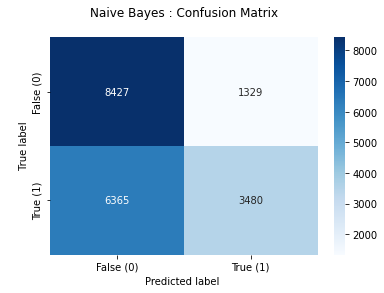

In [294]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues', fmt='d')

ax.set_title('Naive Bayes : Confusion Matrix\n');
ax.set_ylabel('\n True label')
ax.set_xlabel('Predicted label ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False (0)','True (1)'])
ax.yaxis.set_ticklabels(['False (0)','True (1)'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [295]:

print ("Accuracy : ", accuracy_score(y_test, y_pred))

print("Precision Score : ",precision_score(y_test, y_pred))

print("F1 Score : ", f1_score(y_test, y_pred))

print("Recall Score : ",recall_score(y_test, y_pred),)      
    


Accuracy :  0.6074690066833325
Precision Score :  0.7236431690580162
F1 Score :  0.4749556435103044
Recall Score :  0.3534789233113255


In [296]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.86      0.69      9756
           1       0.72      0.35      0.47      9845

    accuracy                           0.61     19601
   macro avg       0.65      0.61      0.58     19601
weighted avg       0.65      0.61      0.58     19601



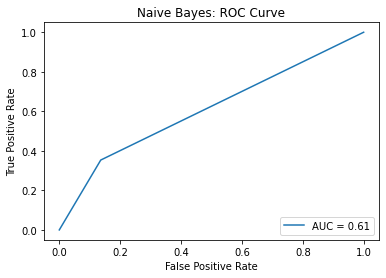

In [297]:
#ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
disp.plot()
plt.title("Naive Bayes: ROC Curve")
plt.show()

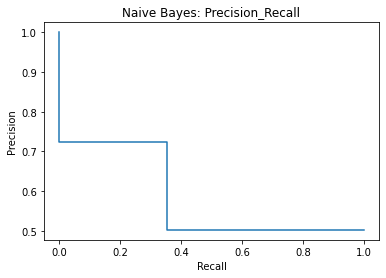

In [298]:
#Precision Recall Curve
prec, rec, thresholds_2 = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=prec, recall=rec)
disp.plot()
plt.title("Naive Bayes: Precision_Recall")
plt.show()